### 데이터 전처리 

## 1. 필요한 라이브러리 불러오기

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import os
import warnings
warnings.filterwarnings(action='ignore') 

for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

## 2. 데이터를 불러오고 데이터 프레임으로 만들기.

In [2]:
df = pd.read_csv("cs-training.csv")
test_df = pd.read_csv("cs-test.csv")
df.head()

,Unnamed: 0,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
1,2,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
2,3,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
3,4,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
4,5,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0


In [3]:
print('Train Shape is :',df.shape,'\nTest shape is :',test_df.shape)

Train Shape is : (150000, 12) 
Test shape is : (101503, 12)


## 3. target data의 분포를 확인한다.

Proportion of People Who Defaulted: 0.06684


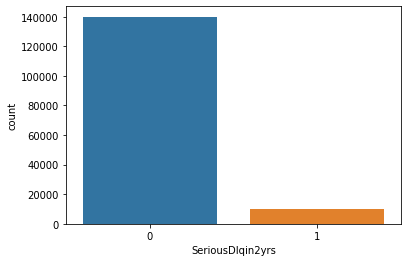

In [5]:
sns.countplot(x="SeriousDlqin2yrs", data=df)
print("Proportion of People Who Defaulted: {}".format(df["SeriousDlqin2yrs"].sum() / len(df)))

## 4. 결측치의 개수를 확인한다.

In [6]:
null_val_sums = df.isnull().sum()
pd.DataFrame({"Column": null_val_sums.index, "Number of Null Values": null_val_sums.values, "Proportion": null_val_sums.values / len(df)})

,Column,Number of Null Values,Proportion
0,Unnamed: 0,0,0.000000
1,SeriousDlqin2yrs,0,0.000000
2,RevolvingUtilizationOfUnsecuredLines,0,0.000000
3,age,0,0.000000
4,NumberOfTime30-59DaysPastDueNotWorse,0,0.000000
5,DebtRatio,0,0.000000
6,MonthlyIncome,29731,0.198207
7,NumberOfOpenCreditLinesAndLoans,0,0.000000
8,NumberOfTimes90DaysLate,0,0.000000
9,NumberRealEstateLoansOrLines,0,0.000000


Proportion의 len(df)는 원 데이터와 결측치의 개수의 비율을 확인하기 위해 한 것이다.

## 5. 데이터의 변수마다 기본 통계값을 확인한다.

### - RevolvingUtilizationOfUnsecuredLines

In [7]:
df["RevolvingUtilizationOfUnsecuredLines"].describe()

count    150000.000000
mean          6.048438
std         249.755371
min           0.000000
25%           0.029867
50%           0.154181
75%           0.559046
max       50708.000000
Name: RevolvingUtilizationOfUnsecuredLines, dtype: float64

굳이 이 변수를 확인한 이유는 신용 한도 중에서 빚의 비율이 얼마나 되는지 즉 현재 자신의 능력에 비해 얼마 만큼의 빚을 지고 있는지 확인한 것이다.

In [ ]:
default_prop = []
for i in range(int(df["RevolvingUtilizationOfUnsecuredLines"].max())):   # 왜 max인가? outlier인데 통계를 구할 때 얘까지 고려해야 하니까.
    temp_ = df.loc[df["RevolvingUtilizationOfUnsecuredLines"] >= i]   # df의 'Revolving...'열에서 i보다 큰 원소들을 추출
    default_prop.append([i, temp_["SeriousDlqin2yrs"].mean()])   # 해당 원소들의 평균과 인덱스를 입력
default_prop   # 데이터가 15만 개여서 굳이 돌리지는 말자...

### 그래프로 덧붙여서 표현.

Text(0.5, 1.0, 'Proportion of Defaulters As Minimum RUUL Increases')

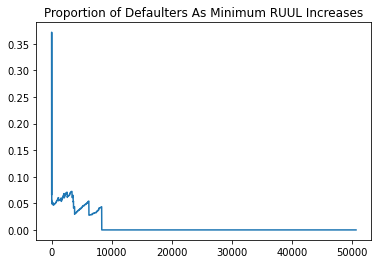

In [9]:
sns.lineplot(x=[i[0] for i in default_prop], y=[i[1] for i in default_prop])
plt.title("Proportion of Defaulters As Minimum RUUL Increases")

## - age(위랑 동일)

In [10]:
df["age"].describe()

count    150000.000000
mean         52.295207
std          14.771866
min           0.000000
25%          41.000000
50%          52.000000
75%          63.000000
max         109.000000
Name: age, dtype: float64

<AxesSubplot:xlabel='age'>

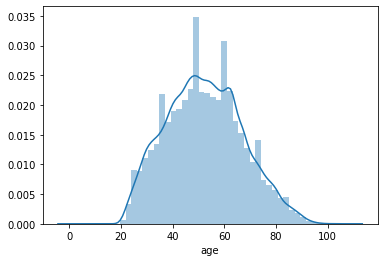

In [11]:
sns.distplot(df["age"])

<AxesSubplot:xlabel='age'>

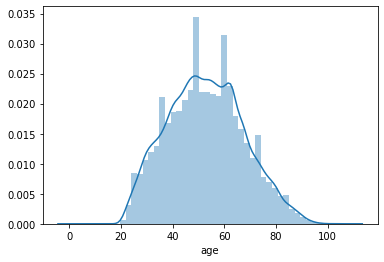

In [12]:
sns.distplot(df.loc[df["SeriousDlqin2yrs"] == 0]["age"])

<AxesSubplot:xlabel='age'>

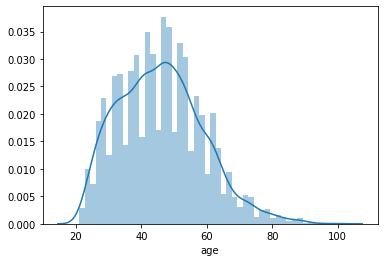

In [13]:
sns.distplot(df.loc[df["SeriousDlqin2yrs"] == 1]["age"])

파산한 사람들의 주요 연령층이 파산하지 않은 연령층보다 젊은 것을 알 수 있다.

## - Late Payment Columns
(NumberOfTimes90DaysLate, NumberOfTime60-89DaysPastDueNotWorse, NumberOfTime30-59DaysPastDueNotWorse)

In [5]:
late_pay_cols = ["NumberOfTimes90DaysLate", "NumberOfTime60-89DaysPastDueNotWorse",
                "NumberOfTime30-59DaysPastDueNotWorse"]
df["NumberOfTimes90DaysLate"].value_counts().sort_index()

0     141662
1       5243
2       1555
3        667
4        291
5        131
6         80
7         38
8         21
9         19
10         8
11         5
12         2
13         4
14         2
15         2
17         1
96         5
98       264
Name: NumberOfTimes90DaysLate, dtype: int64

In [15]:
df["NumberOfTime60-89DaysPastDueNotWorse"].value_counts().sort_index()

0     142396
1       5731
2       1118
3        318
4        105
5         34
6         16
7          9
8          2
9          1
11         1
96         5
98       264
Name: NumberOfTime60-89DaysPastDueNotWorse, dtype: int64

In [16]:
df["NumberOfTime30-59DaysPastDueNotWorse"].value_counts().sort_index()

0     126018
1      16033
2       4598
3       1754
4        747
5        342
6        140
7         54
8         25
9         12
10         4
11         1
12         2
13         1
96         5
98       264
Name: NumberOfTime30-59DaysPastDueNotWorse, dtype: int64

In [17]:
df.loc[df["NumberOfTimes90DaysLate"] > 17][late_pay_cols].describe()

,NumberOfTimes90DaysLate,NumberOfTime60-89DaysPastDueNotWorse,NumberOfTime30-59DaysPastDueNotWorse
count,269.000000,269.000000,269.000000
mean,97.962825,97.962825,97.962825
std,0.270628,0.270628,0.270628
min,96.000000,96.000000,96.000000
25%,98.000000,98.000000,98.000000
50%,98.000000,98.000000,98.000000
75%,98.000000,98.000000,98.000000
max,98.000000,98.000000,98.000000


In [6]:
df[late_pay_cols].describe()

,NumberOfTimes90DaysLate,NumberOfTime60-89DaysPastDueNotWorse,NumberOfTime30-59DaysPastDueNotWorse
count,150000.000000,150000.000000,150000.000000
mean,0.265973,0.240387,0.421033
std,4.169304,4.155179,4.192781
min,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000
max,98.000000,98.000000,98.000000


In [27]:
pd.DataFrame(df[late_pay_cols[2]].value_counts()).sort_index()
# sns.distplot(df[late_pay_cols[1]].dropna())

,NumberOfTime30-59DaysPastDueNotWorse
0,126018
1,16033
2,4598
3,1754
4,747
5,342
6,140
7,54
8,25
9,12


명령어의 의미는 가장 심각한 채무인 NumberOfTimes90DaysLate 에서 가장 빈번하게 체납한 사람들의 체납 변수들의 통계치들을 확인하고 싶다는 의미이다.

In [18]:
distinct_triples_counts = dict()
for arr in df.loc[df["NumberOfTimes90DaysLate"] > 17][late_pay_cols].values:
    triple = ",".join(list(map(str, arr)))   # map(str, arr)은 arr을 str 시켜주겠다는 의미
    if triple not in distinct_triples_counts:
        distinct_triples_counts[triple] = 0
    else:
        distinct_triples_counts[triple] += 1
distinct_triples_counts

{'98,98,98': 263, '96,96,96': 4}

각자의 채무 횟수를 조사해보니 98,98,98이 총 263번 나왔고 95,96,96이 4번 나왔다.

### - DebtRatio

In [19]:
df["DebtRatio"].describe()

count    150000.000000
mean        353.005076
std        2037.818523
min           0.000000
25%           0.175074
50%           0.366508
75%           0.868254
max      329664.000000
Name: DebtRatio, dtype: float64

In [20]:
df["DebtRatio"].quantile(0.95)

2449.0

In [21]:
df.loc[df['DebtRatio'] > df["DebtRatio"].quantile(0.95)][["DebtRatio", "MonthlyIncome", "SeriousDlqin2yrs"]].describe()

,DebtRatio,MonthlyIncome,SeriousDlqin2yrs
count,7494.000000,379.000000,7494.000000
mean,4417.958367,0.084433,0.055111
std,7875.314649,0.278403,0.228212
min,2450.000000,0.000000,0.000000
25%,2893.250000,0.000000,0.000000
50%,3491.000000,0.000000,0.000000
75%,4620.000000,0.000000,0.000000
max,329664.000000,1.000000,1.000000


In [22]:
len(df[(df["DebtRatio"] > df["DebtRatio"].quantile(0.95)) & (df['SeriousDlqin2yrs'] == df['MonthlyIncome'])])

331

In [23]:
df.loc[df["DebtRatio"] > df["DebtRatio"].quantile(0.95)]["MonthlyIncome"].value_counts()

0.0    347
1.0     32
Name: MonthlyIncome, dtype: int64

In [24]:
df["DebtRatio"].quantile(0.975)

3489.024999999994

In [25]:
df.loc[df["DebtRatio"] > df["DebtRatio"].quantile(0.975)][["DebtRatio", "MonthlyIncome", "SeriousDlqin2yrs"]].describe()

,DebtRatio,MonthlyIncome,SeriousDlqin2yrs
count,3750.000000,185.000000,3750.000000
mean,5917.488000,0.064865,0.064267
std,10925.524011,0.246956,0.245260
min,3490.000000,0.000000,0.000000
25%,3957.250000,0.000000,0.000000
50%,4619.000000,0.000000,0.000000
75%,5789.500000,0.000000,0.000000
max,329664.000000,1.000000,1.000000


In [26]:
len(df[(df["DebtRatio"] > df["DebtRatio"].quantile(0.975)) & (df['SeriousDlqin2yrs'] == df['MonthlyIncome'])])

164

In [27]:
df.loc[df["DebtRatio"] > df["DebtRatio"].quantile(0.975)]["MonthlyIncome"].value_counts()

0.0    173
1.0     12
Name: MonthlyIncome, dtype: int64

In [28]:
print("Number of people who owe around 3490 or more times what they own and have same values for MonthlyIncome and SeriousDlqin2yrs: {}"\
     .format(len(df.loc[(df["DebtRatio"] > df["DebtRatio"].quantile(0.975)) & (df["MonthlyIncome"] == df["SeriousDlqin2yrs"])])))

Number of people who owe around 3490 or more times what they own and have same values for MonthlyIncome and SeriousDlqin2yrs: 164


### - MonthlyIncome

<AxesSubplot:xlabel='MonthlyIncome'>

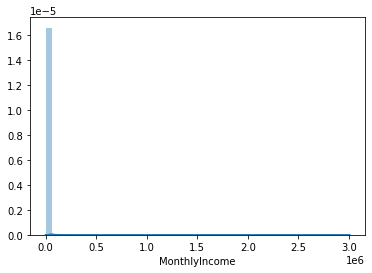

In [29]:
sns.distplot(df["MonthlyIncome"].dropna())

In [30]:
df["MonthlyIncome"].describe()

count    1.202690e+05
mean     6.670221e+03
std      1.438467e+04
min      0.000000e+00
25%      3.400000e+03
50%      5.400000e+03
75%      8.249000e+03
max      3.008750e+06
Name: MonthlyIncome, dtype: float64

<AxesSubplot:xlabel='MonthlyIncome'>

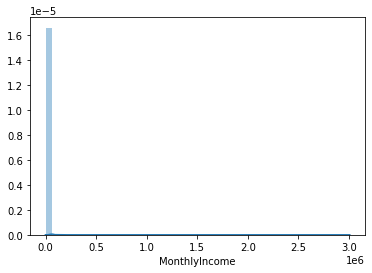

In [31]:
sns.distplot(df.loc[df["DebtRatio"] <= df["DebtRatio"].quantile(0.975)]["MonthlyIncome"].dropna())

### - NumberOfOpenCreditLinesAndLoans

In [32]:
df["NumberOfOpenCreditLinesAndLoans"].describe()

count    150000.000000
mean          8.452760
std           5.145951
min           0.000000
25%           5.000000
50%           8.000000
75%          11.000000
max          58.000000
Name: NumberOfOpenCreditLinesAndLoans, dtype: float64

In [33]:
df["NumberOfOpenCreditLinesAndLoans"].value_counts()

6     13614
7     13245
5     12931
8     12562
4     11609
9     11355
10     9624
3      9058
11     8321
12     7005
2      6666
13     5667
14     4546
1      4438
15     3645
16     3000
17     2370
0      1888
18     1874
19     1433
20     1169
21      864
22      685
23      533
24      422
25      337
26      239
27      194
28      150
29      114
30       88
31       74
32       52
33       47
34       35
35       27
36       18
38       13
40       10
39        9
45        8
43        8
42        8
37        7
48        6
41        4
54        4
49        4
46        3
52        3
51        2
56        2
57        2
50        2
47        2
44        2
53        1
58        1
Name: NumberOfOpenCreditLinesAndLoans, dtype: int64

<AxesSubplot:xlabel='NumberOfOpenCreditLinesAndLoans'>

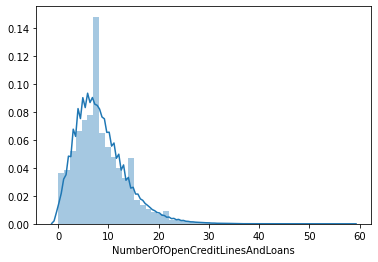

In [34]:
sns.distplot(df["NumberOfOpenCreditLinesAndLoans"])

### - NumberRealEstateLoansOrLines

In [35]:
df["NumberRealEstateLoansOrLines"].describe()

count    150000.000000
mean          1.018240
std           1.129771
min           0.000000
25%           0.000000
50%           1.000000
75%           2.000000
max          54.000000
Name: NumberRealEstateLoansOrLines, dtype: float64

In [36]:
df["NumberRealEstateLoansOrLines"].value_counts()

0     56188
1     52338
2     31522
3      6300
4      2170
5       689
6       320
7       171
8        93
9        78
10       37
11       23
12       18
13       15
14        7
15        7
16        4
17        4
25        3
18        2
19        2
20        2
23        2
32        1
21        1
26        1
29        1
54        1
Name: NumberRealEstateLoansOrLines, dtype: int64

<AxesSubplot:xlabel='NumberRealEstateLoansOrLines', ylabel='count'>

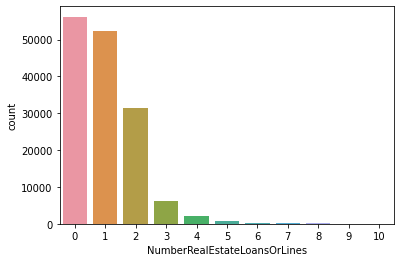

In [37]:
sns.countplot(x="NumberRealEstateLoansOrLines", data=df.loc[df["NumberRealEstateLoansOrLines"] <= 10])

### - NumberOfDependents

In [38]:
df["NumberOfDependents"].describe()

count    146076.000000
mean          0.757222
std           1.115086
min           0.000000
25%           0.000000
50%           0.000000
75%           1.000000
max          20.000000
Name: NumberOfDependents, dtype: float64

In [39]:
df["NumberOfDependents"].value_counts()

0.0     86902
1.0     26316
2.0     19522
3.0      9483
4.0      2862
5.0       746
6.0       158
7.0        51
8.0        24
9.0         5
10.0        5
13.0        1
20.0        1
Name: NumberOfDependents, dtype: int64

In [40]:
df.loc[df["NumberOfDependents"] <= 10]["SeriousDlqin2yrs"].describe()

count    146074.000000
mean          0.067411
std           0.250733
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           1.000000
Name: SeriousDlqin2yrs, dtype: float64

<AxesSubplot:xlabel='NumberOfDependents', ylabel='count'>

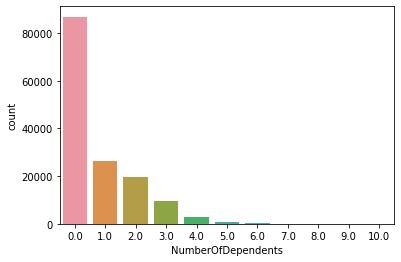

In [41]:
sns.countplot(x="NumberOfDependents", data=df.loc[df["NumberOfDependents"] <= 10])

## *제안 (kaggle에서 참고하여 진행) 
- Remove samples with values of DebtRatio above its 97.5 percentile
- Set 0 <= RevolvingUtilizationOfUnsecuredLines < 13
- Set NumberOfTimes90DaysLate <= 17
- Impute MonthlyIncome with its median, or with a normally distributed variable with MonthlyIncome's mean and standard deviation
- Impute NumberOfDependents with its mode

In [42]:
df1=df[df['DebtRatio']< 3489.1]
df1.shape

(146250, 12)

In [43]:
fix1 = lambda x: 13 if x > 13 else x   # lambda 조건문 else 꼭 써라....
df1["RevolvingUtilizationOfUnsecuredLines"] = df1["RevolvingUtilizationOfUnsecuredLines"].apply(fix1)
df1.shape

(146250, 12)

아마 loc method를 사용해도 변경가능할 것이다.  
df1.loc[df1['RevolvingUtilizationOfUnsecuredLines'] >= 13, 'RevolvingUtilizationOfUnsecuredLines'] = 13

In [44]:
fix2 = lambda x: 17 if x > 17 else x   # lambda 조건문 else 꼭 써라....
df1["NumberOfTimes90DaysLate"] = df1["NumberOfTimes90DaysLate"].apply(fix2)
df1.shape

(146250, 12)

In [45]:
df1['MonthlyIncome'].fillna(df1['MonthlyIncome'].median(),inplace=True)

In [46]:
df1['NumberOfDependents'].mode()

0    0.0
dtype: float64

부양 가족 수가 0인 사람이 많다는 것은 1인 가구가 가장 많다는 뜻이다. 위의 제안처럼 부양가족의 결측치에는 최빈값인 0으로 대체하겠다.

In [47]:
df1['NumberOfDependents'].fillna(df1['NumberOfDependents'].mode(),inplace=True)
df1.shape

(146250, 12)

In [48]:
df1.info()
test_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 146250 entries, 0 to 149999
Data columns (total 12 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   Unnamed: 0                            146250 non-null  int64  
 1   SeriousDlqin2yrs                      146250 non-null  int64  
 2   RevolvingUtilizationOfUnsecuredLines  146250 non-null  float64
 3   age                                   146250 non-null  int64  
 4   NumberOfTime30-59DaysPastDueNotWorse  146250 non-null  int64  
 5   DebtRatio                             146250 non-null  float64
 6   MonthlyIncome                         146250 non-null  float64
 7   NumberOfOpenCreditLinesAndLoans       146250 non-null  int64  
 8   NumberOfTimes90DaysLate               146250 non-null  int64  
 9   NumberRealEstateLoansOrLines          146250 non-null  int64  
 10  NumberOfTime60-89DaysPastDueNotWorse  146250 non-null  int64  
 11  

In [49]:
df1['NumberOfDependents'].fillna(0, inplace = True)
test_df['NumberOfDependents'].fillna(0, inplace = True)

In [50]:
df1['MonthlyIncome'].fillna(df1['MonthlyIncome'].median(), inplace=True)
test_df['MonthlyIncome'].fillna(df1['MonthlyIncome'].median(), inplace=True)

In [51]:
df1.info()
test_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 146250 entries, 0 to 149999
Data columns (total 12 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   Unnamed: 0                            146250 non-null  int64  
 1   SeriousDlqin2yrs                      146250 non-null  int64  
 2   RevolvingUtilizationOfUnsecuredLines  146250 non-null  float64
 3   age                                   146250 non-null  int64  
 4   NumberOfTime30-59DaysPastDueNotWorse  146250 non-null  int64  
 5   DebtRatio                             146250 non-null  float64
 6   MonthlyIncome                         146250 non-null  float64
 7   NumberOfOpenCreditLinesAndLoans       146250 non-null  int64  
 8   NumberOfTimes90DaysLate               146250 non-null  int64  
 9   NumberRealEstateLoansOrLines          146250 non-null  int64  
 10  NumberOfTime60-89DaysPastDueNotWorse  146250 non-null  int64  
 11  

## 6. 머신러닝 모델 분석을 진행한다

#### GridCV를 활용한 최적의 파라메터를 탐색하기 위해 Train 데이터 내에서 Train 데이터와 Test 데이터로 나눠준다

In [52]:
SeriousDlqIn2Yrs = df1['SeriousDlqin2yrs']
df1 = df1.drop(['Unnamed: 0','SeriousDlqin2yrs'],axis=1)
test_df = test_df.drop(['Unnamed: 0','SeriousDlqin2yrs'],axis=1)

In [53]:
from sklearn.model_selection import train_test_split
y_df = SeriousDlqIn2Yrs
X_df = df1
X_train,X_test,y_train,y_test = train_test_split(X_df,y_df,test_size=0.2,random_state=0)

#### 첫번째 분류모델. 의사결정나무
##### 데이터 균일도를 바탕으로 규칙기반으로 분류해나가는 방법

In [59]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings('ignore')
dt_clf=DecisionTreeClassifier(random_state=0)

In [60]:
params2={'max_depth':[1,2,3,5,7,10],
       'min_samples_split':[5,10,20]}
grid_cv2=GridSearchCV(dt_clf,param_grid=params2,scoring='roc_auc',cv=5)
grid_cv2.fit(X_train,y_train)
print('GridSearchCV 최고 평균 roc_auc 점수:',grid_cv2.best_score_)
print('GridSearchCV 최적 하이퍼 파라미터:',grid_cv2.best_params_)

GridSearchCV 최고 평균 roc_auc 점수: 0.8489543575457109
GridSearchCV 최적 하이퍼 파라미터: {'max_depth': 7, 'min_samples_split': 20}


In [61]:
best_df_clf=grid_cv2.best_estimator_
pred_df=best_df_clf.predict(X_test)
roc_auc=roc_auc_score(pred_df,y_test)
print('결정트리 예측 roc_auc:',roc_auc)

결정트리 예측 roc_auc: 0.7440346799963936


In [62]:
pred_probs=pd.DataFrame(best_df_clf.predict_proba(test_df))[1]
pred_probs.index += 1 
pred_probs.to_csv(r"submit_dctree_data1.csv", index=True)

#### 두번째 분류모델. 랜덤포레스트
##### 랜덤포레스트는 배깅의 한종류로, 같은 알고리즘(의사결정나무)로 여러 개의 분류기를 만들어서 투표를 통해 최종 결정하는 알고리즘. 분류기들에 가중치를 주어 선형결합을 통해 최종 결과를 예측하는 방법에 해당. 쉽게 말해, 기본적인 의사결정나무와는 달리 부트스트랩 방식을 통해 전체데이터에서 중복을 허용하여 n개의 데이터를 추출하고, 또한 피처값 중에서 중복 허용 없이 k개를 추출하여 만든 데이터를 바탕으로 분류기에 넣어 데이터를 예측한다. 이러한 과정을 여러 번 반복하여 여러 개의 분류기에서 나온 결과값을 바탕으로 예측을 진행한다.

In [54]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score

In [64]:
#제출 데이터 생성
rf_clf=RandomForestClassifier(max_depth=10, min_samples_leaf=10, min_samples_split=3)
rf_clf.fit(X_train, y_train)
pred_probs=pd.DataFrame(rf_clf.predict_proba(test_df))[1]
rf_wrapper_pred=pd.DataFrame(pred_probs)
rf_wrapper_pred.index += 1 
rf_wrapper_pred.to_csv(r"submit_rf_data1.csv", index=True)

In [55]:
rf_clf=RandomForestClassifier(max_depth=13, min_samples_leaf=10, min_samples_split=3)
rf_clf.fit(X_df, y_df)
pred_probs=pd.DataFrame(rf_clf.predict_proba(test_df))[1]
rf_wrapper_pred=pd.DataFrame(pred_probs)
rf_wrapper_pred.index += 1 
rf_wrapper_pred.to_csv(r"submit_rf_data1-15.csv", index=True)

#### 세번째 분류모델. XG부스트(회귀도 가능)
##### 부스팅 알고리즘은 분포에 대해 약한 학습자를 반복적으로 학습시켜 최종적으로 강한 학습자를 만드는 것을 목표로한다. 강한 학습자를 만들기 위해 약한 학습자들의 잔차가 큰 잘못 예측한 데이터에 대해 가중치를 부여하여 예측성을 향상시키고자 한다. 의사결정나무를 기반으로 분석하는 부스팅 기법에는 LightGBM과 XGboost가 있으며, 타 부스팅 기법 대시 분석 소요 시간을 획기적으로 줄이면서도, 예측력은 그대로 유지하고 있거나 더 뛰어나다.

In [66]:
import xgboost as xgb
from xgboost import XGBClassifier

In [67]:
y_org = y_train
X_org = X_train

xgb_wrapper = XGBClassifier(learning_rate=1 , max_depth=3, n_estimators=10, random_state=1)
evals=[(X_test,y_test)]
xgb_wrapper.fit(X_org, y_org, early_stopping_rounds=100, eval_metric="logloss",eval_set=evals,verbose=True)
xgb_wrapper_pred = xgb_wrapper.predict(X_test)
print('XGBoost 예측 roc_auc:',roc_auc)

[0]	validation_0-logloss:0.25156
Will train until validation_0-logloss hasn't improved in 100 rounds.
[1]	validation_0-logloss:0.19910
[2]	validation_0-logloss:0.18758
[3]	validation_0-logloss:0.18544
[4]	validation_0-logloss:0.18424
[5]	validation_0-logloss:0.18346
[6]	validation_0-logloss:0.18337
[7]	validation_0-logloss:0.18340
[8]	validation_0-logloss:0.18314
[9]	validation_0-logloss:0.18307
XGBoost 예측 roc_auc: 0.7440346799963936


In [68]:
#제출 데이터 생성
pred_probs=pd.DataFrame(xgb_wrapper.predict_proba(test_df))[1]
xgb_wrapper_pred=pd.DataFrame(pred_probs)
xgb_wrapper_pred.index += 1 
xgb_wrapper_pred
xgb_wrapper_pred.to_csv(r"submit_xgboost_data1.csv", index=True)

#### 네번쨰 분류모델. LightGBM
##### XG부스트의 개선 분류모델. XG부스트는 부스팅 모델중에서 상대적으로 빠르긴하나, 여전히 시간이 오래 걸린다는 문제점을 가지고 있습니다. 예측성을 유지하면서도 이러한 문제를 해결한 알고리즘이 LightGBM이다. LightGBM은 대용량 데이터 처리에 적합하며, 메모리 사용량도 적으며, CPU뿐만 아니라 GPU도 활용가능하다. 다만, 너무 적은 양의 데이터에 사용시 과적합 문제가 발생할 가능성이 높다

In [69]:
from lightgbm import LGBMClassifier

In [70]:
lgbm_wrapper_time=LGBMClassifier(learning_rate=0.5, max_depth=3, n_estimators=10, random_state=1)
evals=[(X_test,y_test)]
lgbm_wrapper_time.fit(X_train, y_train, early_stopping_rounds=100, eval_metric="logloss",eval_set=evals,verbose=True)
lgbm_wrapper_time_preds=lgbm_wrapper_time.predict(X_test)
lgbm_time_roc_auc = roc_auc_score(lgbm_wrapper_time_preds,y_test )
print('LightGBM 최적 파라미터 roc_auc 예측 점수:',lgbm_time_roc_auc)

[1]	valid_0's binary_logloss: 0.204598
Training until validation scores don't improve for 100 rounds
[2]	valid_0's binary_logloss: 0.195318
[3]	valid_0's binary_logloss: 0.190961
[4]	valid_0's binary_logloss: 0.188572
[5]	valid_0's binary_logloss: 0.187216
[6]	valid_0's binary_logloss: 0.186289
[7]	valid_0's binary_logloss: 0.185686
[8]	valid_0's binary_logloss: 0.185232
[9]	valid_0's binary_logloss: 0.185024
[10]	valid_0's binary_logloss: 0.184281
Did not meet early stopping. Best iteration is:
[10]	valid_0's binary_logloss: 0.184281
LightGBM 최적 파라미터 roc_auc 예측 점수: 0.7555881629313713


In [71]:
pred_probs=pd.DataFrame(lgbm_wrapper_time.predict_proba(test_df))[1]
lgbm_wrapper_pred=pd.DataFrame(pred_probs)
lgbm_wrapper_pred.index += 1 
lgbm_wrapper_pred
lgbm_wrapper_pred.to_csv(r"submit_lgbm_data1.csv", index=True)